# Validation of Estimated Water Frequency in Wet and Dry Season :
### Procedure : 273 Points of Validation are used (Pumped and not Pumped). A buffer of 30 m of radius was created for each point (+/- one pixem of Landsat TM).
### The number of pixels, mean, min, max (and others) of water frequency are determined within each buffer. For the validation, we consider the probability of detection which depends on the considered threshold of water frequency


## 1.  Wet Season

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Open data 

In [11]:
# Read CSV file into DataFrame data_img
path='D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Validation_of_WaterFrequency_UsingPtsValidation/'

file='Zonal_Stats_Point_Validation_WetSeason.csv'


print(file)
filename=path+file
print(filename)
data_valid_WetSeason = pd.read_csv(filename, sep = ';',index_col=None)

# Show dataframe
print(data_valid_WetSeason)
for col in data_valid_WetSeason.columns:
    print(col)

Zonal_Stats_Point_Validation_WetSeason.csv
D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Validation_of_WaterFrequency_UsingPtsValidation/Zonal_Stats_Point_Validation_WetSeason.csv
       Type Pump      WHname       X        Y  _count      _sum     _mean  \
0       pan    Y  BROKEN RIF  515258  7900439     3.0  0.103448  0.034483   
1       pan    N     CHIVISA  476309  7933859     3.0  1.247059  0.415686   
2       pan    Y  DETEEMA DA  410150  7935084     4.0  3.252564  0.813141   
3    spring    N  DETEEMA PI  410561  7934406     3.0  0.031469  0.010490   
4    spring    N  DILILO SEE  404031  7938514     3.0  0.196369  0.065456   
..      ...  ...         ...     ...      ...     ...       ...       ...   
268     NaN    N  MANZIBOM S  399836  7920786     4.0  0.253408  0.063352   
269     NaN    N  BAMBUSI SP  413695  7953492     4.0  0.180642  0.045160   
270     NaN    N     CHAWATO  423390  7951756     3.0  0.672006  0.224002

In [12]:
# Count the number of individuals with _max of 5% or higher
num_individuals = (data_valid_WetSeason['_max'] >= 0.05).sum()

# Calculate the total number of individuals
total_individuals = len(data_valid_WetSeason)

# Calculate the percentage of individuals with _max of 5% or higher
percentage = (num_individuals / total_individuals) * 100

print(f"Percentage of individuals with _max of 5% or higher: {percentage}%")

Percentage of individuals with _max of 5% or higher: 88.27838827838828%


In [13]:
NumberOfValidationPoint=len(data_valid_WetSeason)
print(NumberOfValidationPoint)

# Assuming data_valid_WetSeason['_max'] is your data
data = data_valid_WetSeason['_max']

# Define the bins
binwidth=0.05
bins = np.arange(min(data), max(data) + binwidth, binwidth)
# Calculate the histogram
hist, bins = np.histogram(data, bins=bins)

# Calculate the cumulative frequencies
cumulative_frequencies =100- (np.cumsum(hist)/273)*100

print(bins)
print(cumulative_frequencies)


273
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[88.27838828 79.48717949 72.52747253 68.13186813 64.46886447 56.77655678
 51.28205128 48.71794872 44.68864469 35.8974359  28.57142857 23.44322344
 17.58241758 10.25641026  8.05860806  4.76190476  3.66300366  2.1978022
  1.0989011   0.        ]


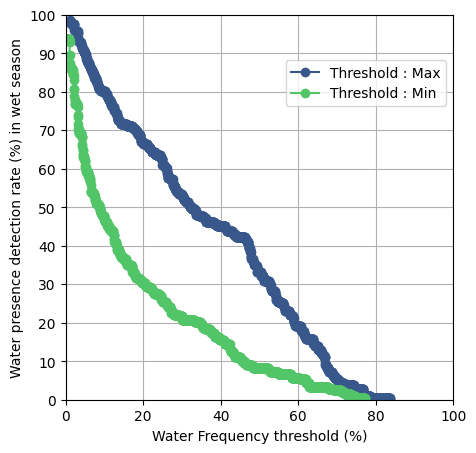

In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Utiliser la palette "viridis" de Seaborn
sns.set_palette("viridis")

# Create a figure
fig, ax = plt.subplots(figsize=(5, 5))

data_max_pump_N = data_valid_WetSeason[data_valid_WetSeason['Pump'] == 'N']['_max']*100
data_min_pump_N = data_valid_WetSeason[data_valid_WetSeason['Pump'] == 'N']['_min']*100
NumberOfValidationPoint_PumpN = len(data_max_pump_N)

# Define the bins
binwidth = 0.05
bins_max = np.arange(min(data_max_pump_N), max(data_max_pump_N) + binwidth, binwidth)
bins_min = np.arange(min(data_min_pump_N), max(data_min_pump_N) + binwidth, binwidth)

# Calculate the histogram
hist_max, bins_max = np.histogram(data_max_pump_N, bins=bins_max)
hist_min, bins_min = np.histogram(data_min_pump_N, bins=bins_min)

# Calculate the cumulative frequencies
cumulative_frequencies_max = np.cumsum(hist_max)
cumulative_frequencies_min = np.cumsum(hist_min)

# Calculate the complement to 100% of the cumulative frequencies
complement_cumulative_frequencies_max = 100 - (cumulative_frequencies_max / NumberOfValidationPoint_PumpN) * 100
complement_cumulative_frequencies_min = 100 - (cumulative_frequencies_min / NumberOfValidationPoint_PumpN) * 100

# Choisir deux couleurs distinctes de la palette viridis
colors = sns.color_palette("viridis", 10)
color_max = colors[2]  # Une couleur distincte pour la courbe Max
color_min = colors[7]  # Une autre couleur distincte pour la courbe Min

# Plot the complement cumulative frequencies with colors suitable for colorblind individuals
ax.plot(bins_max[:-1], complement_cumulative_frequencies_max, marker='o', label='Threshold : Max', color=color_max)
ax.plot(bins_min[:-1], complement_cumulative_frequencies_min, marker='o', label='Threshold : Min', color=color_min)

# Set the labels and title
ax.set_xlabel('Water Frequency threshold (%)')
ax.set_ylabel('Water presence detection rate (%) in wet season')

# Set the grid, limits and legend
ax.grid(True)
ax.set_ylim(0, 100)
ax.set_xlim(0, 100)
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# Set the scale for each axis
plt.yticks(np.arange(0, 101, 10))

plt.show()

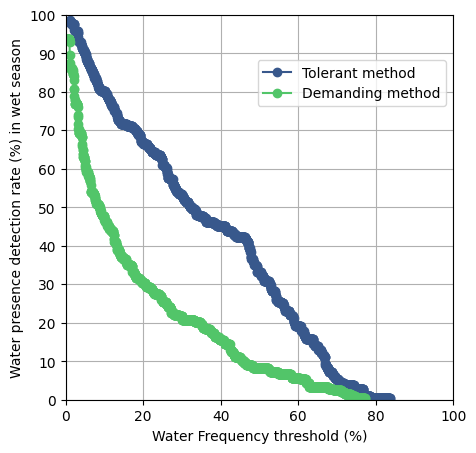

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Utiliser la palette "viridis" de Seaborn
sns.set_palette("viridis")

# Create a figure
fig, ax = plt.subplots(figsize=(5, 5))

data_max_pump_N = data_valid_WetSeason[data_valid_WetSeason['Pump'] == 'N']['_max']*100
data_min_pump_N = data_valid_WetSeason[data_valid_WetSeason['Pump'] == 'N']['_min']*100
NumberOfValidationPoint_PumpN = len(data_max_pump_N)

# Define the bins
binwidth = 0.05
bins_max = np.arange(min(data_max_pump_N), max(data_max_pump_N) + binwidth, binwidth)
bins_min = np.arange(min(data_min_pump_N), max(data_min_pump_N) + binwidth, binwidth)

# Calculate the histogram
hist_max, bins_max = np.histogram(data_max_pump_N, bins=bins_max)
hist_min, bins_min = np.histogram(data_min_pump_N, bins=bins_min)

# Calculate the cumulative frequencies
cumulative_frequencies_max = np.cumsum(hist_max)
cumulative_frequencies_min = np.cumsum(hist_min)

# Calculate the complement to 100% of the cumulative frequencies
complement_cumulative_frequencies_max = 100 - (cumulative_frequencies_max / NumberOfValidationPoint_PumpN) * 100
complement_cumulative_frequencies_min = 100 - (cumulative_frequencies_min / NumberOfValidationPoint_PumpN) * 100

# Choisir deux couleurs distinctes de la palette viridis
colors = sns.color_palette("viridis", 10)
color_max = colors[2]  # Une couleur distincte pour la courbe Max
color_min = colors[7]  # Une autre couleur distincte pour la courbe Min

# Plot the complement cumulative frequencies with colors suitable for colorblind individuals
ax.plot(bins_max[:-1], complement_cumulative_frequencies_max, marker='o', label='Tolerant method', color=color_max)
ax.plot(bins_min[:-1], complement_cumulative_frequencies_min, marker='o', label='Demanding method', color=color_min)

# Set the labels and title
ax.set_xlabel('Water Frequency threshold (%)')
ax.set_ylabel('Water presence detection rate (%) in wet season')

# Set the grid, limits and legend
ax.grid(True)
ax.set_ylim(0, 100)
ax.set_xlim(0, 100)
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# Set the scale for each axis
plt.yticks(np.arange(0, 101, 10))

plt.show()

## 2.  Dry Season

In [18]:
# Read CSV file into DataFrame data_img
path='D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Validation_of_WaterFrequency_UsingPtsValidation/'

file='Zonal_Stats_Point_Validation_DrySeason.csv'


print(file)
filename=path+file
print(filename)
data_valid_DrySeason = pd.read_csv(filename, sep = ';',index_col=None)

# Show dataframe
print(data_valid_DrySeason)
for col in data_valid_DrySeason.columns:
    print(col)

Zonal_Stats_Point_Validation_DrySeason.csv
D:/OneDrive/Documents/Thèse/Travail/03 - Script/Kamel Python/WaterMappingInZimbabweFromLandsat-main/Validation_of_WaterFrequency_UsingPtsValidation/Zonal_Stats_Point_Validation_DrySeason.csv
       Type Pump      WHname       X        Y  _count      _sum     _mean  \
0       pan    Y  BROKEN RIF  515258  7900439     3.0  0.152809  0.050936   
1       pan    N     CHIVISA  476309  7933859     3.0  0.507463  0.169154   
2       pan    Y  DETEEMA DA  410150  7935084     4.0  3.568182  0.892045   
3    spring    N  DETEEMA PI  410561  7934406     3.0  0.000000  0.000000   
4    spring    N  DILILO SEE  404031  7938514     3.0  0.000000  0.000000   
..      ...  ...         ...     ...      ...     ...       ...       ...   
268     NaN    N  MANZIBOM S  399836  7920786     4.0  0.007519  0.001880   
269     NaN    N  BAMBUSI SP  413695  7953492     4.0  0.000000  0.000000   
270     NaN    N     CHAWATO  423390  7951756     3.0  0.111795  0.037265

In [19]:
# Count the number of individuals with _max of 5% or higher
num_individuals = (data_valid_DrySeason['_max'] >= 0.05).sum()

# Calculate the total number of individuals
total_individuals = len(data_valid_DrySeason)

# Calculate the percentage of individuals with _max of 5% or higher
percentage = (num_individuals / total_individuals) * 100

print(f"Percentage of individuals with _max of 5% or higher: {percentage}%")

Percentage of individuals with _max of 5% or higher: 62.637362637362635%


In [20]:
# Count the number of individuals with _min of 5% or higher
num_individuals = (data_valid_DrySeason['_min'] >= 0.05).sum()

# Calculate the total number of individuals
total_individuals = len(data_valid_DrySeason)

# Calculate the percentage of individuals with _min of 5% or higher
percentage = (num_individuals / total_individuals) * 100

print(f"Percentage of individuals with _min of 5% or higher: {percentage}%")

Percentage of individuals with _min of 5% or higher: 35.16483516483517%


In [21]:
NumberOfValidationPoint=len(data_valid_DrySeason)
print(NumberOfValidationPoint)

# Assuming data_valid_WetSeason['_max'] is your data
data = data_valid_DrySeason['_max']

# Define the bins
binwidth=0.05
bins = np.arange(min(data), max(data) + binwidth, binwidth)
# Calculate the histogram
hist, bins = np.histogram(data, bins=bins)

# Calculate the cumulative frequencies
cumulative_frequencies =100- (np.cumsum(hist)/273)*100

print(bins)
print(cumulative_frequencies)


273
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
[62.63736264 58.24175824 54.21245421 50.54945055 47.61904762 43.58974359
 40.29304029 36.63003663 31.86813187 26.73992674 22.34432234 19.78021978
 17.21611722 13.18681319  9.52380952  7.69230769  4.02930403  2.93040293
  1.83150183  0.        ]


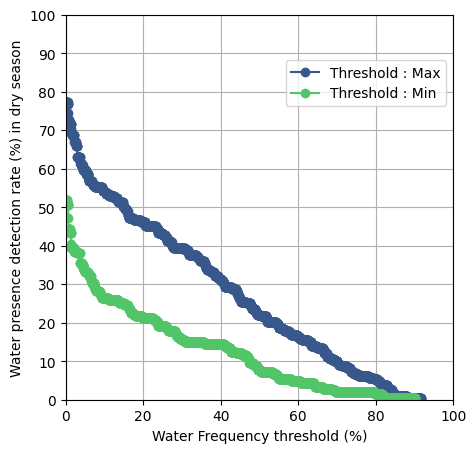

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Utiliser la palette "viridis" de Seaborn
sns.set_palette("viridis")

# Create a figure
fig, ax = plt.subplots(figsize=(5, 5))

data_max_pump_N = data_valid_DrySeason[data_valid_DrySeason['Pump'] == 'N']['_max']*100
data_min_pump_N = data_valid_DrySeason[data_valid_DrySeason['Pump'] == 'N']['_min']*100
NumberOfValidationPoint_PumpN = len(data_max_pump_N)

# Define the bins
binwidth = 0.05
bins_max = np.arange(min(data_max_pump_N), max(data_max_pump_N) + binwidth, binwidth)
bins_min = np.arange(min(data_min_pump_N), max(data_min_pump_N) + binwidth, binwidth)

# Calculate the histogram
hist_max, bins_max = np.histogram(data_max_pump_N, bins=bins_max)
hist_min, bins_min = np.histogram(data_min_pump_N, bins=bins_min)

# Calculate the cumulative frequencies
cumulative_frequencies_max = np.cumsum(hist_max)
cumulative_frequencies_min = np.cumsum(hist_min)

# Calculate the complement to 100% of the cumulative frequencies
complement_cumulative_frequencies_max = 100 - (cumulative_frequencies_max / NumberOfValidationPoint_PumpN) * 100
complement_cumulative_frequencies_min = 100 - (cumulative_frequencies_min / NumberOfValidationPoint_PumpN) * 100

# Choisir deux couleurs distinctes de la palette viridis
colors = sns.color_palette("viridis", 10)
color_max = colors[2]  # Une couleur distincte pour la courbe Max
color_min = colors[7]  # Une autre couleur distincte pour la courbe Min

# Plot the complement cumulative frequencies with colors suitable for colorblind individuals
ax.plot(bins_max[:-1], complement_cumulative_frequencies_max, marker='o', label='Threshold : Max', color=color_max)
ax.plot(bins_min[:-1], complement_cumulative_frequencies_min, marker='o', label='Threshold : Min', color=color_min)

# Set the labels and title
ax.set_xlabel('Water Frequency threshold (%)')
ax.set_ylabel('Water presence detection rate (%) in dry season')

# Set the grid, limits and legend
ax.grid(True)
ax.set_ylim(0, 100)
ax.set_xlim(0, 100)
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# Set the scale for each axis
plt.yticks(np.arange(0, 101, 10))

plt.show()

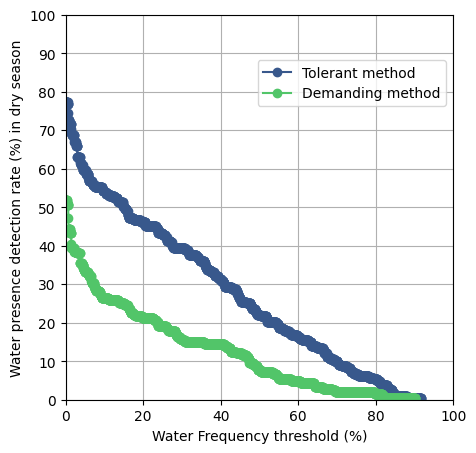

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Utiliser la palette "viridis" de Seaborn
sns.set_palette("viridis")

# Create a figure
fig, ax = plt.subplots(figsize=(5, 5))

data_max_pump_N = data_valid_DrySeason[data_valid_DrySeason['Pump'] == 'N']['_max']*100
data_min_pump_N = data_valid_DrySeason[data_valid_DrySeason['Pump'] == 'N']['_min']*100
NumberOfValidationPoint_PumpN = len(data_max_pump_N)

# Define the bins
binwidth = 0.05
bins_max = np.arange(min(data_max_pump_N), max(data_max_pump_N) + binwidth, binwidth)
bins_min = np.arange(min(data_min_pump_N), max(data_min_pump_N) + binwidth, binwidth)

# Calculate the histogram
hist_max, bins_max = np.histogram(data_max_pump_N, bins=bins_max)
hist_min, bins_min = np.histogram(data_min_pump_N, bins=bins_min)

# Calculate the cumulative frequencies
cumulative_frequencies_max = np.cumsum(hist_max)
cumulative_frequencies_min = np.cumsum(hist_min)

# Calculate the complement to 100% of the cumulative frequencies
complement_cumulative_frequencies_max = 100 - (cumulative_frequencies_max / NumberOfValidationPoint_PumpN) * 100
complement_cumulative_frequencies_min = 100 - (cumulative_frequencies_min / NumberOfValidationPoint_PumpN) * 100

# Choisir deux couleurs distinctes de la palette viridis
colors = sns.color_palette("viridis", 10)
color_max = colors[2]  # Une couleur distincte pour la courbe Max
color_min = colors[7]  # Une autre couleur distincte pour la courbe Min

# Plot the complement cumulative frequencies with colors suitable for colorblind individuals
ax.plot(bins_max[:-1], complement_cumulative_frequencies_max, marker='o', label='Tolerant method', color=color_max)
ax.plot(bins_min[:-1], complement_cumulative_frequencies_min, marker='o', label='Demanding method', color=color_min)

# Set the labels and title
ax.set_xlabel('Water Frequency threshold (%)')
ax.set_ylabel('Water presence detection rate (%) in dry season')

# Set the grid, limits and legend
ax.grid(True)
ax.set_ylim(0, 100)
ax.set_xlim(0, 100)
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

# Set the scale for each axis
plt.yticks(np.arange(0, 101, 10))

plt.show()